In [10]:
%reload_ext nb_black
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv"
df = pd.read_csv(url)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# count of the number of days the trial data lasts
df["date"] = pd.DatetimeIndex(df.timestamp).date
df.date.nunique()

23

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# conversion rate for each group
df.groupby("group").converted.mean()

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
alpha = 0.05

# Check for adequate sample sizes.

In [18]:
# size of testing groups
df.group.value_counts()

treatment    145311
control      145274
Name: group, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# separate the control group
control = df[df.group == "control"]

# separate the treatment group
test = df[df.group == "treatment"]

print("control size: ", str(control.converted.count()))
print("treatment size: ", str(treatment.converted.count()))
print("test proportion: ", str(df.converted.mean()))

control size:  145274
treatment size:  145311
test proportion:  0.11959667567149027


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# signup rates for test and control
test_rate = test.converted.mean()
control_rate = control.converted.mean()
print("Test rate: ", str(test_rate))
print("Control rate: ", str(control_rate))

Test rate:  0.11880724790277405
Control rate:  0.1203863045004612


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# statistical significance of test and control rates
t, p = stats.ttest_ind(test.converted, control.converted)
print(t)
print(p)

-1.3116069027036805
0.18965383906859376


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Check for changes over time in results.

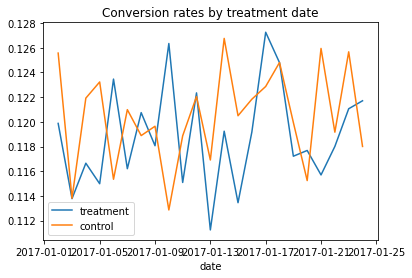

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# rollout date plot
fig = df[df.group == "treatment"][["date", "converted"]].groupby("date").mean().plot()
df[df.group == "control"][["date", "converted"]].groupby("date").mean().plot(ax=fig)

plt.legend(["treatment", "control"])
plt.title("Conversion rates by treatment date")
plt.show()

# Formally test for a significant difference in conversions between treatment and control groups.

In [37]:
date_p = []
for day in df.date.unique():
    date_data = df[df.date == day]
    t, p = stats.ttest_ind(
        date_data[date_data.group == "control"].converted,
        date_data[date_data.group == "treatment"].converted,
    )
    date_p.append([p, day])
    print(str(t), str(p))

1.8123288054674913 0.0699579338988825
-0.05182821974845549 0.9586663564605943
0.6795024407954999 0.49683133482307695
-0.33111903181744556 0.7405597598504309
-2.3999515991310387 0.01641085244784032
0.4836129647924235 0.628668638020595
-0.7611804663738991 0.446562930057432
0.9315635899845935 0.3515792521983202
1.261388402374626 0.20719113309271808
0.0026642818202597274 0.9978742538059032
0.28071255594768935 0.7789352633524722
0.2056136446252576 0.837095874040602
-0.4909032980527966 0.6235093367111435
0.8094922831773846 0.41824647028626705
-0.4369071658956722 0.6621858156795764
1.4468255388280735 0.14797003344175097
-1.445201350915974 0.14842480715695958
1.0178087858982594 0.3087876929639064
0.8500557494800433 0.3953094968293003
0.005102928348269819 0.9959285470042827
0.6557398855583756 0.5120179205036728
0.4678178596106672 0.6399226098635871
1.311670708102873 0.18965417024438827


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

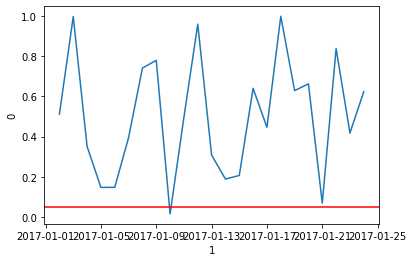

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# date and p values from list converted to dataframe
date_p = pd.DataFrame(date_p)

# red line shows statistically significant threshold
sns.lineplot(date_p[1], date_p[0]).axhline(0.05, c="r", linestyle="-")
plt.show()